In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utils import *

import pandas as pd
from gaussian_process_models.experiments import exp1

from building_availability_matrices.utils import (
    NO_CLIENTS,
    CORR,
    UNCORR,
    CORR_FT,
    UNCORR_FT,
)

In [2]:
# Number of FL training rounds:
n_rounds = 100

# Common carbon budget
global_carbon_budget = 7 # kgCO2e

# Uniform carbon budget
carbon_budget = 1 # kgCO2eq

# list of countries/clients:
countries = [i+1 for i in range(NO_CLIENTS)]

main_folder = 'availability_matrices/av-mat-4'

formatted_array = list(range(n_rounds))

In [3]:
res = exp1(freq1=0.5, k=10, seq_len=n_rounds, n_clients=NO_CLIENTS)

2024-10-09 11:28:22.457391: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-09 11:28:22.460873: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-09 11:28:22.471471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 11:28:22.489618: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 11:28:22.494752: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 11:28:22.511212: I tensorflow/core/platform/cpu_feature_gu

In [4]:
# Correlated case

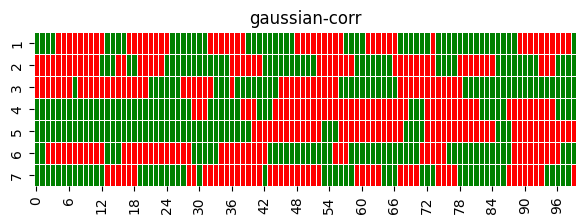

In [5]:
res_corr = res[CORR]
folder = main_folder
key_word = 'gaussian-corr'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [6]:
from utils import lambda_2

In [7]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.7171428571428571, 0.6971428571428571, 0.7779591836734694, 0.7979591836734694, 0.8587755102040817, 0.7575510204081632, 0.6567346938775511]


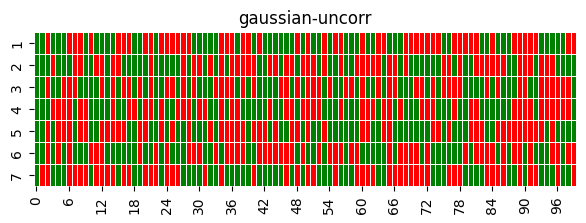

In [8]:
res_corr = res[UNCORR]
folder = main_folder
key_word = 'gaussian-uncorr'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [9]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.21224489795918355, 0.07061224489795936, -0.13142857142857145, 0.1110204081632653, 0.1110204081632653, 0.010204081632652962, 0.1718367346938776]


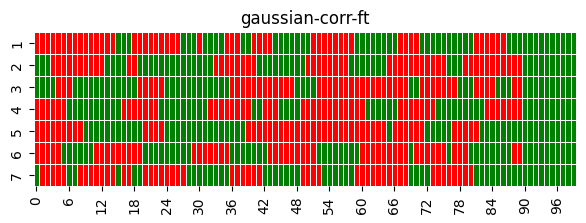

In [10]:
res_corr = res[CORR_FT]
folder = main_folder
key_word = 'gaussian-corr-ft'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [11]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.6971428571428571, 0.7575510204081632, 0.7171428571428571, 0.7375510204081632, 0.8183673469387756, 0.6971428571428571, 0.6767346938775511]


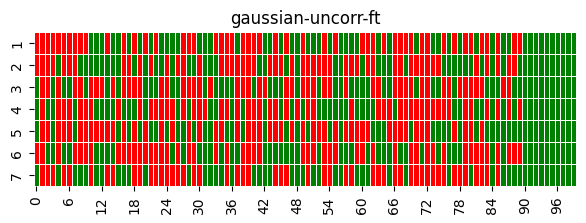

In [12]:
res_corr = res[UNCORR_FT]
folder = main_folder
key_word = 'gaussian-uncorr-ft'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [13]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.050612244897959346, 0.21224489795918355, 0.15142857142857125, 0.07061224489795936, 0.03020408163265298, 0.21224489795918355, 0.23224489795918357]
